# Problemas de optimización escalar
Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento, así como los resultados obtenidos.

1. El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [37]:
b = sp.symbols('b', real=True)
l = (10 - b) / 2
r = b / 2
h = sp.sqrt(l**2 - r**2)
V = (1/3) * sp.pi * r**2 * h

dV = sp.diff(V, b)
c = sp.solve(dV, b)
c

[0.0, 4.00000000000000]

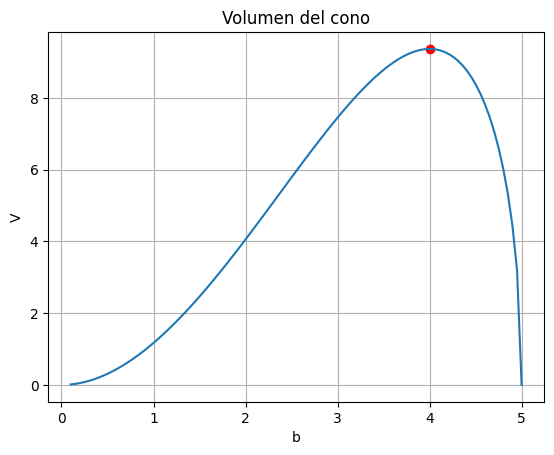

El valor de b que maximiza el volumen es: 4.00000000000000
El valor de l correspondiente es: 3.00000000000000


In [38]:
plt.plot(c[1], V.subs(b, c[1]), 'ro')
bnum = np.linspace(0.1, 5, 100)
vnum = sp.lambdify(b, V, 'numpy')
plt.plot(bnum, vnum(bnum))
plt.xlabel('b')
plt.ylabel('V')
plt.title('Volumen del cono')
plt.grid()
plt.show()
print(f"El valor de b que maximiza el volumen es: {c[1]}")
print(f"El valor de l correspondiente es: {(10 - c[1]) / 2}")

2. Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

[3/2]
Altura óptima de los postes: 1.500 m
Largo óptimo del travesaño: 3.000 m


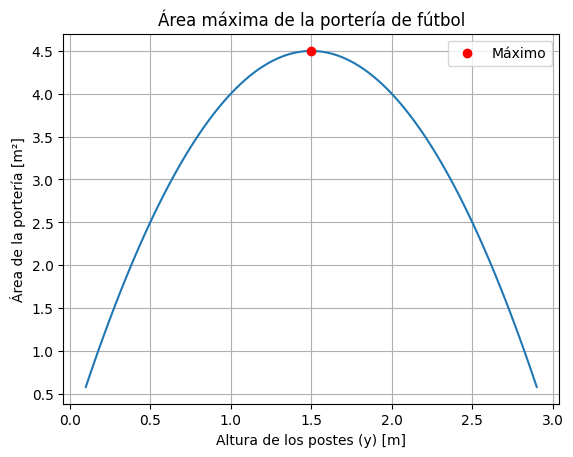

In [39]:
# Restricción: 2y + x = 6
# Área: A = x * y
x, y = sp.symbols('x y', real=True, positive=True)

A = x * y
restriccion = 2*y + x - 6
x_sol = sp.solve(restriccion, x)[0]
A_y = A.subs(x, x_sol)

dA = sp.diff(A_y, y)
y_crit = sp.solve(dA, y)
print(y_crit)
print(f"Altura óptima de los postes: {y_crit[0]:.3f} m")
print(f"Largo óptimo del travesaño: {x_sol.subs(y, y_crit[0]):.3f} m")


y_vals = np.linspace(0.1, 2.9, 100)
A_func = sp.lambdify(y, A_y, 'numpy')
plt.plot(y_vals, A_func(y_vals))
plt.plot(y_crit[0], A_func(y_crit[0]), 'ro', label='Máximo')
plt.xlabel('Altura de los postes (y) [m]')
plt.ylabel('Área de la portería [m²]')
plt.title('Área máxima de la portería de fútbol')
plt.grid()
plt.legend()
plt.show()